Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

/anaconda3/envs/python35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [34]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "./image_data/"
model_path_name = "./tf_vae/"

z_size=32

In [35]:
filelist = os.listdir(DATA_DIR)

In [36]:
from PIL import Image
img_list = []
for i in filelist[:20]:
    filename = filelist[0]
    img = Image.open(os.path.join(DATA_DIR, filename))
    img = img.resize((64,64),Image.ANTIALIAS)
    img = np.array(img).astype(np.float32)/255.0
    img_list.append(img)

In [37]:
img.shape

(64, 64, 3)

In [39]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.
Tensor("dec_deconv4/Sigmoid:0", shape=(?, 64, 64, 3), dtype=float32)


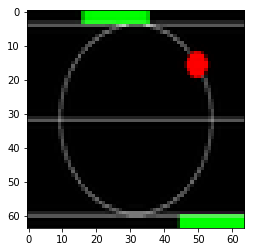

In [40]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(img)
plt.show()

In [41]:
batch_z = vae.encode(img_list)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-0.5016 -1.3558  0.8921 -0.0152  0.2959  2.1854 -0.297   0.2842  0.6531  0.9472  0.4674 -1.4219
  0.1915  1.375  -0.4566 -0.3973  1.9499 -0.3162  1.9404 -0.2582  0.198  -0.3073  1.0725 -2.0217
 -0.3404 -0.1501  0.7891 -0.0181  1.5767  0.652  -0.4406 -0.2388]


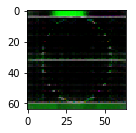

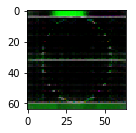

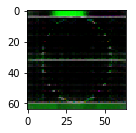

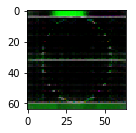

In [42]:
# show reconstruction
plt.subplot(221)
plt.imshow(reconstruct[0])
plt.show()

plt.subplot(222)
plt.imshow(reconstruct[5])
plt.show()

plt.subplot(223)
plt.imshow(reconstruct[10])
plt.show()

plt.subplot(224)
plt.imshow(reconstruct[19])
plt.show()



In [43]:
a = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [44]:
len(a)

256